### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

### Loading the dataset

In [2]:
sales = pd.read_csv("sales.csv")

### Exploring the dataset

In [3]:
## shape of the dataset

sales.shape

(4248, 20)

In [4]:
## information on individual columns

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [5]:
## more info on the dataset

sales.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [6]:
## first two rows of the sales column

sales.head(2)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular


In [7]:
## using the describe function with scipy 

from scipy.stats import describe

sales1 = sales.drop(columns = ["State", "Market", "Market Size", "Date", "Product Type", "Product", "Type"])

sales_description = pd.DataFrame(describe(sales1),
                                index = ["nobs", "minmax", "mean", "variance", "skewness", "kurtosis"])
sales_description

,0
nobs,4248
minmax,"([203.0, -638.0, -302.0, 17.0, 0.0, 10.0, 0.0,..."
mean,"[582.2780131826742, 61.097693032015066, 104.29..."
variance,"[48903.03665326849, 10344.628315844531, 8900.5..."
skewness,"[0.08449998056952336, 0.44520573924234763, 1.4..."
kurtosis,"[-0.9729376725811516, 9.779541380894662, 5.330..."


In [8]:
for key, value in describe(sales1)._asdict().items():
    print(f"{key}: {value}")

nobs: 4248
minmax: (array([ 2.030e+02, -6.380e+02, -3.020e+02,  1.700e+01,  0.000e+00,
        1.000e+01,  0.000e+00, -3.534e+03, -3.200e+02,  0.000e+00,
       -2.100e+02,  0.000e+00,  1.000e+00]), array([ 985.,  778.,  613.,  912.,  364.,  190.,  156., 8252.,  560.,
        450.,  690., 1140.,   13.]))
mean: [582.27801318  61.09769303 104.2933145  192.98752354  84.43314501
  54.06355932  31.18502825 749.38135593  60.913371    74.83050847
 100.81920904 175.64971751   6.88700565]
variance: [4.89030367e+04 1.03446283e+04 8.90051154e+03 2.28412221e+04
 4.52253144e+03 1.04669057e+03 7.30256785e+02 4.36963167e+05
 6.32758562e+03 4.38749187e+03 8.57526469e+03 2.21686854e+04
 1.34254209e+01]
skewness: [0.08449998 0.44520574 1.42466637 1.88127463 1.67177937 1.31890421
 1.64464537 2.89385796 1.27142796 1.97413273 2.0236107  2.28271083
 0.07371341]
kurtosis: [-0.97293767  9.77954138  5.33086535  3.48838631  2.26825134  1.58630036
  2.41210205 28.51053775  8.27280788  4.48103071  7.06497709  6.6

In [9]:
## checking the tail of the dataset

sales.tail()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular
4247,985,Louisiana,South,Small Market,4.0,90.0,153.0,64.0,81.0,58.0,-113.0,10.0,50.0,80.0,130.0,4,05/01/11 00:00:00,Espresso,Caffe Latte,Regular


### Cleaning the dataset

In [10]:
## checking for any null values

sales.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [11]:
## checking for any duplicates in the dataset

sales.duplicated().sum()

0

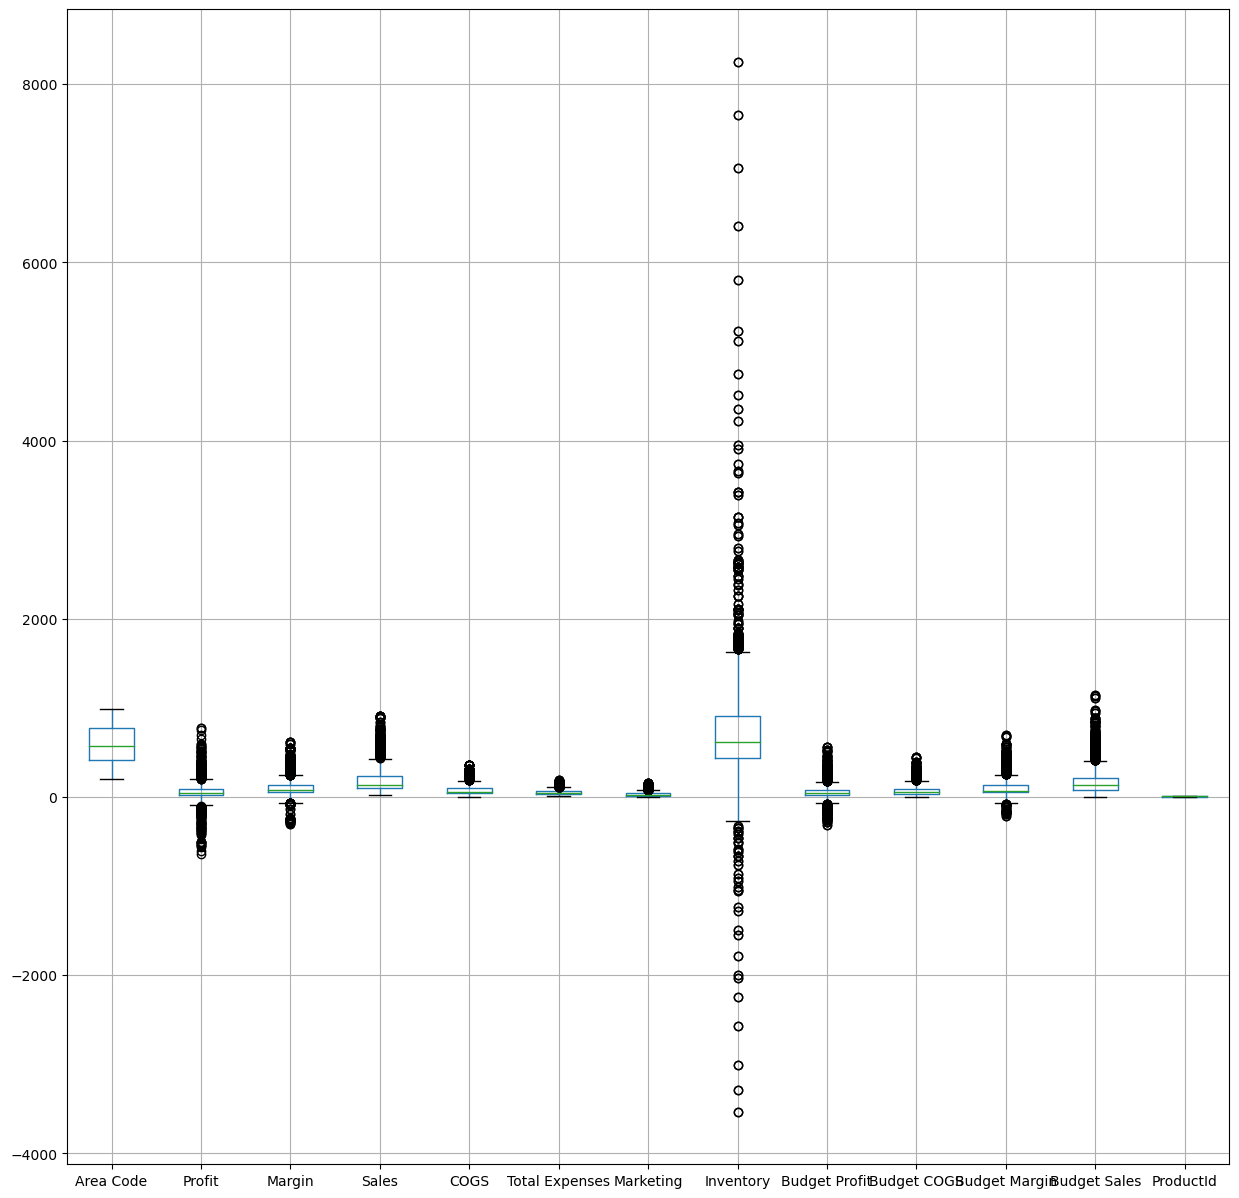

In [12]:
## Cchecking for any outliers

plt.figure(figsize = (15,15))
sales.boxplot()
plt.grid(True)
plt.show()

In [13]:
## Dealing with outliers in the inventory column

q1 = sales["Inventory"].quantile(0.25)
q3 = sales["Inventory"].quantile(0.75)

iqr = q3 - q1 

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

sales.loc[(sales["Inventory"] > upper_limit) | (sales["Inventory"] < lower_limit)] # identifying the outliers

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
131,209,California,West,Major Market,-138.0,-67.0,87.0,154.0,71.0,49.0,1832.0,-150.0,190.0,-90.0,100.0,1,07/01/10 00:00:00,Coffee,Amaretto,Regular
133,209,California,West,Major Market,-131.0,-25.0,109.0,127.0,63.0,40.0,2947.0,-90.0,150.0,-30.0,120.0,1,12/01/11 00:00:00,Coffee,Amaretto,Regular
134,209,California,West,Major Market,276.0,428.0,712.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
135,209,California,West,Major Market,410.0,428.0,759.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2,04/01/11 00:00:00,Coffee,Columbian,Regular
138,209,California,West,Major Market,216.0,329.0,576.0,247.0,113.0,81.0,1744.0,210.0,240.0,310.0,550.0,6,12/01/10 00:00:00,Espresso,Decaf Espresso,Decaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4198,978,Massachusetts,East,Major Market,324.0,379.0,454.0,75.0,55.0,24.0,-3287.0,300.0,60.0,340.0,400.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
4199,978,Massachusetts,East,Major Market,778.0,613.0,659.0,52.0,46.0,17.0,-1493.0,560.0,40.0,590.0,630.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular


In [14]:
sales_2 = sales.loc[(sales["Inventory"] > upper_limit) | (sales["Inventory"] < lower_limit)] ## removing the outliers

print("Before Removing Outliers:", len(sales))
print("After Removing Outliers:", len(sales_2))
print("Outliers:", len(sales) - len(sales_2))

Before Removing Outliers: 4248
After Removing Outliers: 346
Outliers: 3902


##### N/B Due to the small size of the dataset, I focused on removing the outliers from the inventory column

### Exploratory Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

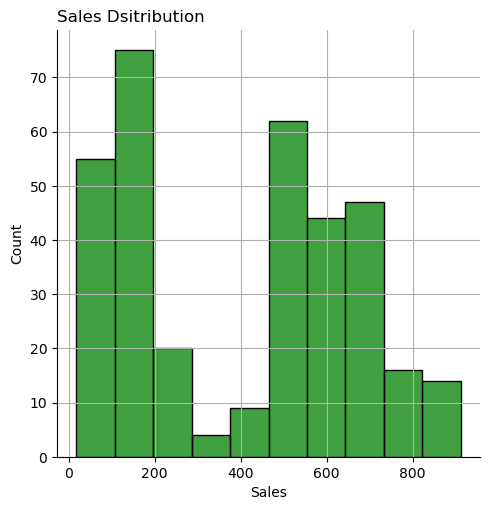

In [15]:
## Sales distribution

plt.figure(figsize = (7,7))
sns.displot(sales_2["Sales"], color = "green")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.grid(True)
plt.title("Sales Dsitribution", loc = "left")
plt.show()

#### Conclusion : The Sales is skewed to the right meaning that the mean is more than the median.

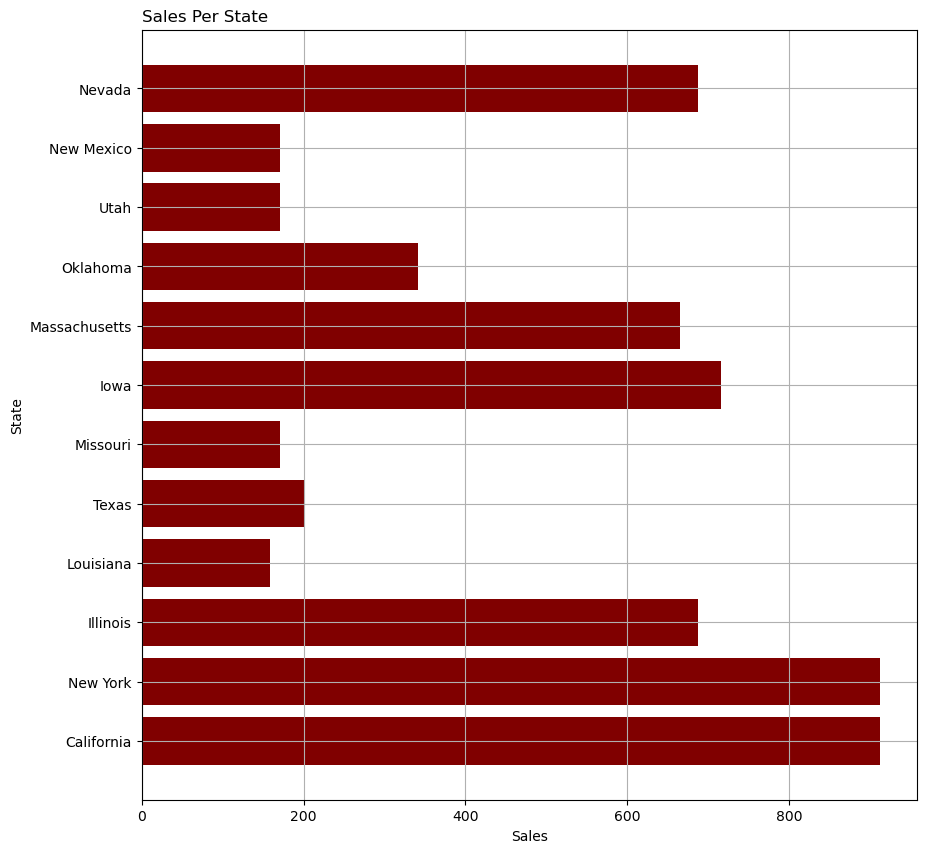

In [16]:
## state with the highest number of sales

plt.figure(figsize = (10,10))
plt.barh(sales_2["State"], sales_2["Sales"], color = "maroon")
plt.xlabel("Sales")
plt.ylabel("State")
plt.grid(True)
plt.title("Sales Per State", loc = "left")
plt.show()

#### Conlusions:
    1. Carlifonia and New York have the highest sales.
    2. Louisiana had the lowest sales.

#### Recommendations:
    1. Effective marketing strategies sould be put in place to increase sales revenue in Louisiana and other low income earning states.
    2. There is need to implement more customer-centric framweorks in medium and low performing states to boost client base.

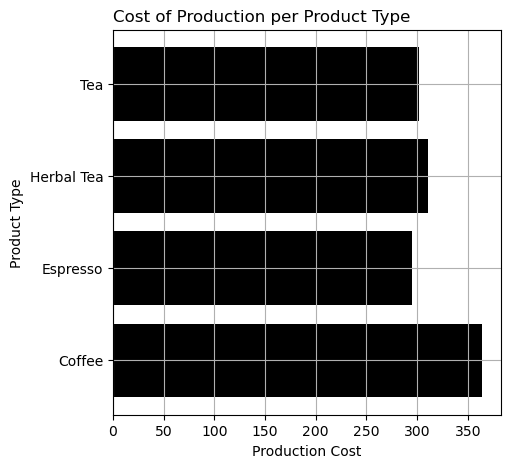

In [20]:
## Product type with the highest cost of production

plt.figure(figsize = (5,5))
plt.barh(sales_2["Product Type"], sales_2["COGS"], color = "black")
plt.xlabel("Production Cost")
plt.ylabel("Product Type")
plt.grid(True)
plt.title("Cost of Production per Product Type", loc = "left")
plt.show()

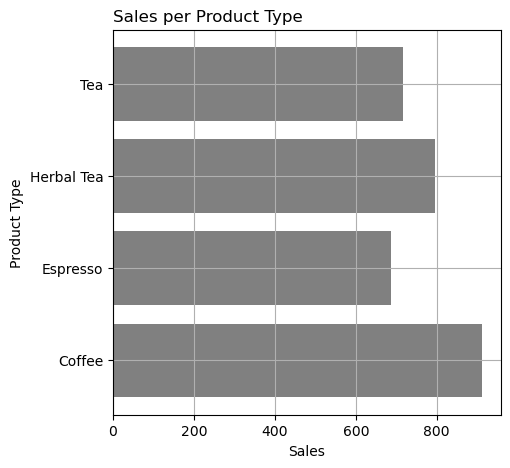

In [18]:
## product type with the highest sales

plt.figure(figsize = (5,5))
plt.barh(sales_2["Product Type"], sales_2["Sales"], color = "grey")
plt.xlabel("Sales")
plt.ylabel("Product Type")
plt.grid(True)
plt.title("Sales per Product Type", loc = "left")
plt.show()

#### Conclusons: 
    1. Coffee has the highest product costs and sales revenue, indicating that consumers prefer coffee over other products.
    2. Expresso has the lowest production costs the least sales.

#### Reccomendations:
    1. More investments should be made to produce expresso in order to continue maximizing on sales.
    2. In order to improve the ROI on tea and expresso, more efficient maketing policies should be focused on tea based on consumer's preference.

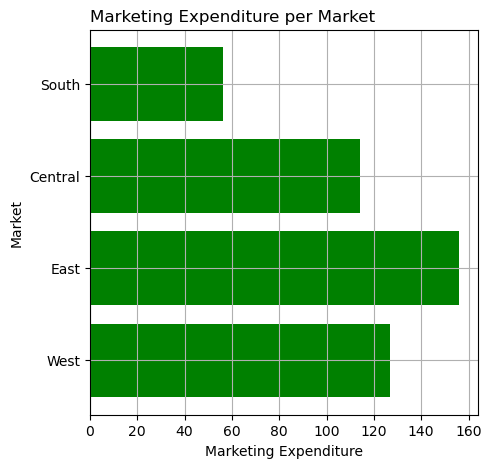

In [21]:
## markets and the marketing budgets

plt.figure(figsize = (5,5))
plt.barh(sales_2["Market"], sales_2["Marketing"], color = "green")
plt.xlabel("Marketing Expenditure")
plt.ylabel("Market")
plt.grid(True)
plt.title("Marketing Expenditure per Market", loc = "left")
plt.show()

#### The east and west have the higher marketing expenditure as compared to the central and south markets.

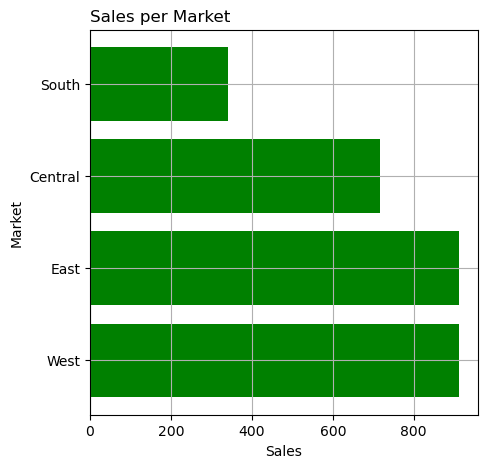

In [22]:
## market and sales

plt.figure(figsize = (5,5))
plt.barh(sales_2["Market"], sales_2["Sales"], color = "green")
plt.xlabel("Sales")
plt.ylabel("Market")
plt.grid(True)
plt.title("Sales per Market", loc = "left")
plt.show()

#### The west and east have more sales as compared to the central and south markets

#### Conclusion: More marketing expenditure should be invested to boost sales in both the south and central regions

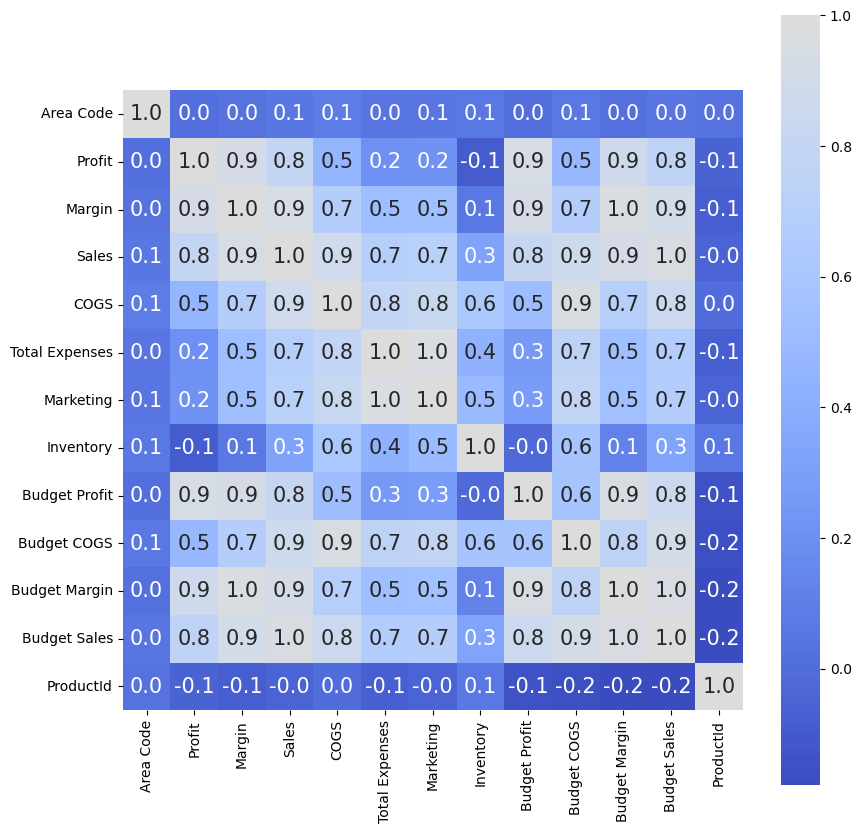

In [23]:
## plotting the correlation of variables

correlation = sales1.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={"size": 15}, fmt=".1f", square=True, center=True, cmap="coolwarm")
plt.show()

In [28]:
## unique market sizes

print(sales_2["Market Size"].unique())
print("  ")
print(sales_2["Product Type"].unique())

['Major Market' 'Small Market']
  
['Coffee' 'Espresso' 'Herbal Tea' 'Tea']


### Building predction models to determine the Profit

#### 1. Linear Regression

In [32]:
sales_2.head(6)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
131,209,California,West,Major Market,-138.0,-67.0,87.0,154.0,71.0,49.0,1832.0,-150.0,190.0,-90.0,100.0,1,07/01/10 00:00:00,Coffee,Amaretto,Regular
133,209,California,West,Major Market,-131.0,-25.0,109.0,127.0,63.0,40.0,2947.0,-90.0,150.0,-30.0,120.0,1,12/01/11 00:00:00,Coffee,Amaretto,Regular
134,209,California,West,Major Market,276.0,428.0,712.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
135,209,California,West,Major Market,410.0,428.0,759.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2,04/01/11 00:00:00,Coffee,Columbian,Regular
138,209,California,West,Major Market,216.0,329.0,576.0,247.0,113.0,81.0,1744.0,210.0,240.0,310.0,550.0,6,12/01/10 00:00:00,Espresso,Decaf Espresso,Decaf
139,209,California,West,Major Market,321.0,329.0,614.0,247.0,113.0,81.0,1744.0,210.0,240.0,310.0,550.0,6,12/01/11 00:00:00,Espresso,Decaf Espresso,Decaf


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


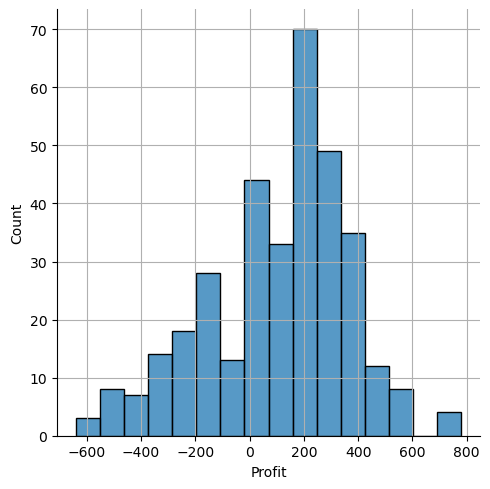

In [34]:
## checking the distribution of the profit column

sns.displot(sales_2["Profit"])
plt.grid(True)
plt.show()

In [35]:
describe(sales_2["Profit"])

DescribeResult(nobs=346, minmax=(-638.0, 778.0), mean=107.58381502890174, variance=69609.19440395408, skewness=-0.47035065422294814, kurtosis=-0.020415792961673507)

In [65]:
## dropping all string and irrelevant columns

df = sales_2.drop(columns = ["Area Code", "State", "Market", "Market Size", "Date", "Product Type", "Product", "Type"])
df

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
131,-138.0,-67.0,87.0,154.0,71.0,49.0,1832.0,-150.0,190.0,-90.0,100.0,1
133,-131.0,-25.0,109.0,127.0,63.0,40.0,2947.0,-90.0,150.0,-30.0,120.0,1
134,276.0,428.0,712.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2
135,410.0,428.0,759.0,284.0,152.0,99.0,2108.0,400.0,350.0,540.0,890.0,2
138,216.0,329.0,576.0,247.0,113.0,81.0,1744.0,210.0,240.0,310.0,550.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4198,324.0,379.0,454.0,75.0,55.0,24.0,-3287.0,300.0,60.0,340.0,400.0,2
4199,778.0,613.0,659.0,52.0,46.0,17.0,-1493.0,560.0,40.0,590.0,630.0,2
4243,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4
4244,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4


In [37]:
## loading the reuired functions for testing 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
## idefining the d.v and i.v

X = df.drop(columns = ["Profit"])
y = df["Profit"]

In [40]:
## dividing the dataset into training and testing sizes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [41]:
## loading the linear regression model

lr = LinearRegression()

In [43]:
## fiting the model with the training data

lr.fit(X_train,y_train)

LinearRegression()

In [44]:
## printing the intercepts

print(lr.intercept_)

40.25591520184577


In [54]:
## printing the coefficients

coefficients = pd.DataFrame(lr.coef_, X_train.columns).T
coefficients = coefficients.rename({0: "Coefficients"})
coefficients

,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
Coefficients,-0.871025,2.036271,-1.94815,-2.653646,1.278819,0.002448,-0.266539,-0.204025,0.260101,0.056076,-2.891383


In [57]:
## predicting the model

pred = lr.predict(X_test)
pred

array([ 252.65243462,  237.91642047, -419.04467978, -203.53028478,
        341.16754483,  164.2009601 ,  -34.97522682,  256.85737365,
        159.05326911,  -42.57464467,  205.25168718,  168.22309214,
        242.78778596,  266.93385857,  237.08273016,   -7.99977281,
        -74.00560376,  250.99693444,  -68.81451275,  189.00796908,
        327.51234706,  334.45486569,  193.08315128,  178.25502552,
        237.76499356,   24.38849127,  220.27911906,  394.67616005,
        257.68043141,  140.19699403,  -82.8234699 ,  298.91310716,
         71.87239151,  317.93805737,  -58.86481315,  296.63732487,
         21.1543165 ,  120.74710746,  444.48060316, -239.05090136,
        548.614029  , -375.47553525,  182.29293663, -297.99904613,
       -174.81572519,   21.47498853,  181.57339225,  451.05112478,
        136.06756163,  186.64918983,  313.68119689,  218.95314281,
       -170.60819994,  287.95923214,  309.43105313,   -5.07108753,
       -247.19598559,  217.71898997,  201.87862499,  396.49599

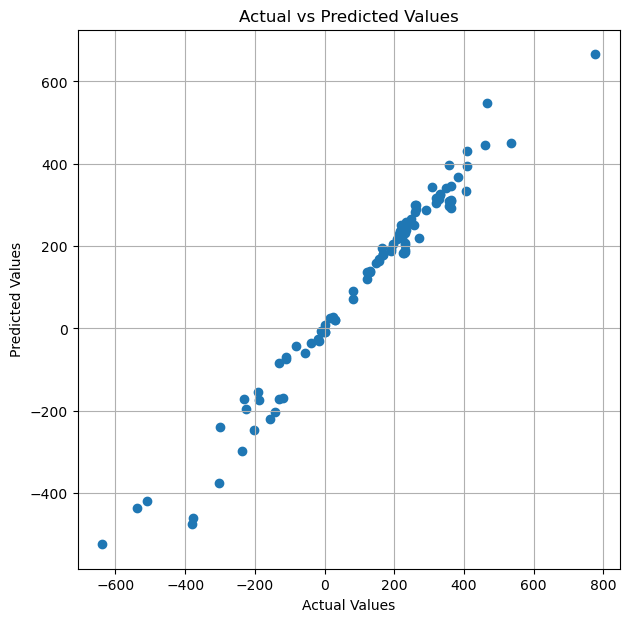

In [56]:
## plotting the results

plt.figure(figsize = (7,7))
plt.scatter(y_test, pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Actual vs Predicted Values")
plt.show()

In [64]:
## Linear Regression metrics

from sklearn.metrics import r2_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

print("R^2:" , r2_score(y_test, pred))
print("Homogeneity Score:", homogeneity_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9723347130327628
Homogeneity Score: 1.0
MAE: 29.332708701717216
MSE: 1581.2275245289431
RMSE 39.76465169631118
Adjusted R^2: 1.3043181566396096


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [61]:
## Checking if the model is overfitting 

y_test_pred = lr.predict(X_test)

In [62]:
## model evaluation for overfitting data

from sklearn.metrics import r2_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

print("R^2:" , r2_score(y_test, pred))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.9723347130327628
Homogeneity Score: 1.0
MAE: 29.332708701717216
MSE: 1581.2275245289431
RMSE 39.76465169631118
Adjusted R^2: 1.3043181566396096


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### The model has an accuracy of 130% and the model evaluation scores for the test data is not differing much with that of the training data hence the model is a good predictor of profit.

#### 2. Random Forest Regressor

In [66]:
## Iporting the random forst regressor

from sklearn.ensemble import RandomForestRegressor

In [67]:
## defining the regressor

rc = RandomForestRegressor()

In [68]:
## fitting the model 

rc.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
## predicting the model

pred_rc = rc.predict(X_train)
pred_rc

array([ 385.99,    1.99,  497.94,  167.98, -414.03, -136.17,   -2.57,
        208.6 ,   -6.28,  -98.97,  273.02,  -10.71,  291.62,  325.7 ,
        -15.87,  305.13,  267.7 ,  343.55, -495.66,   -9.35, -448.97,
         20.34,  321.73,  -13.46,  503.73,   -8.49,  268.85,  269.76,
       -393.68,  268.2 , -277.92,  387.6 ,  232.18,  -12.73,  324.92,
        292.11, -334.01,  506.95,  231.36,  564.21,   50.27, -488.94,
         -8.1 ,  637.32,  221.02,  182.11,  328.86,  135.49, -153.73,
         58.76,  206.71,   16.25,  219.48,  148.89, -135.58,    3.51,
        219.57, -384.62, -163.6 , -458.6 ,  227.68,  346.99,  743.72,
        167.71, -150.77,  317.4 , -407.34,   97.09,  266.21,   65.81,
       -247.53,  484.55,  331.45,   -5.44,  211.48,  228.07, -184.08,
        150.73,  378.39,  271.19,  104.27,  425.27, -192.18,  379.47,
         44.26, -146.72,   39.66,  167.77,   41.54, -462.17,  541.62,
        445.99,   76.95,  395.24,  494.69,  346.14,  158.12,  326.84,
         -2.26,  108

In [72]:
## Regressor evaluation scores

print("R^2:" , r2_score(y_train, pred_rc))
print("Homogeneity Score:", homogeneity_score(y_train, pred_rc))
print("MAE:", mean_absolute_error(y_train, pred_rc))
print("MSE:", mean_squared_error(y_train, pred_rc))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred_rc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred_rc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9944500230343933
Homogeneity Score: 0.997751647791779
MAE: 14.703719008264464
MSE: 413.40633471074386
RMSE 20.332396187138
Adjusted R^2: 1.0610497466216733


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [73]:
## checking if the model is overfitting

y_test_pred_rc = rc.predict(X_test)

In [74]:
print("R^2:" , r2_score(y_test, y_test_pred_rc))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_rc))
print("MAE:", mean_absolute_error(y_test, y_test_pred_rc))
print("MSE:", mean_squared_error(y_test, y_test_pred_rc))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_rc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_rc)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.9553695884843788
Homogeneity Score: 0.993832690782629
MAE: 31.938942307692308
MSE: 2550.8802855769227
RMSE 50.506240065727745
Adjusted R^2: 1.490934526671833


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### Despite the model's accuracy of 99%, the evaluation scores slighly differ from the evaluation scores of the train data. 

#### 3. XGBoost Regressor

In [75]:
## importing the regressor

from xgboost import XGBRegressor

## defining the regressor

xgr = XGBRegressor()

In [76]:
## fitting the model

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
## predicting the model

xgr_pred = xgr.predict(X_train)
xgr_pred

array([ 401.79593  ,    0.9916027,  508.04678  ,  164.25783  ,
       -420.3546   , -118.62185  ,   -4.096867 ,  197.37117  ,
         -4.111737 ,  -88.2926   ,  247.39851  ,  -10.95818  ,
        285.85144  ,  326.13593  ,  -16.938055 ,  303.34274  ,
        258.0327   ,  312.47656  , -521.99243  ,   -8.271601 ,
       -408.10156  ,   24.46964  ,  295.05716  ,  -12.905672 ,
        508.03357  ,   -8.586137 ,  259.41666  ,  262.2794   ,
       -343.20828  ,  258.92984  , -299.27225  ,  401.29733  ,
        224.92528  ,  -11.926204 ,  362.36835  ,  271.9943   ,
       -352.91135  ,  510.83804  ,  225.49507  ,  598.35767  ,
         56.39353  , -540.54926  ,   -8.46619  ,  690.0051   ,
        220.84807  ,  191.07265  ,  361.87952  ,  128.13422  ,
       -139.77159  ,   55.555744 ,  184.26724  ,   17.435663 ,
        220.99483  ,  149.89302  , -154.13039  ,    3.1409562,
        225.51404  , -340.3652   , -145.32863  , -506.7297   ,
        230.27086  ,  367.16583  ,  755.0651   ,  167.0

In [78]:
## Checking for the evaluation metrics

print("R^2:" , r2_score(y_train, xgr_pred))
print("Homogeneity Score:", homogeneity_score(y_train, xgr_pred))
print("MAE:", mean_absolute_error(y_train, xgr_pred))
print("MSE:", mean_squared_error(y_train, xgr_pred))
print("RMSE", np.sqrt(mean_squared_error(y_train, xgr_pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, xgr_pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9999918103327344
Homogeneity Score: 0.9999999999999998
MAE: 0.5543340560325907
MSE: 0.6100314195405182
RMSE 0.7810450816313474
Adjusted R^2: 1.0000900863399211


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [79]:
## checking if the model is overfitting

y_test_pred_xgr = xgr.predict(X_test)

print("R^2:" , r2_score(y_test, y_test_pred_xgr))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_xgr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_xgr))
print("MSE:", mean_squared_error(y_test, y_test_pred_xgr))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_xgr)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_xgr)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.9528916743176575
Homogeneity Score: 0.9969163453913145
MAE: 29.88510372260442
MSE: 2692.5070862849734
RMSE 51.8893735391455
Adjusted R^2: 1.518191582505767


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### Despite the model's accuracy of 99%, the evaluation scores slightly differ from the evaluation scores of the train data. 

#### 4. SVM Regressor

In [80]:
## Creating a scaled set to be used in the model to improve the results

## importing the standard scalar

from sklearn.preprocessing import StandardScaler

## defining the standard scalar

sc = StandardScaler()

In [81]:
## defining the training and testing dataset

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [82]:
## training the model

from sklearn import svm

In [83]:
## creating an svm regressor

svm_reg = svm.SVR()

In [84]:
## fitting the model

svm_reg.fit(x_train, y_train)

SVR()

In [86]:
## predicting the model

pred_sc = svm_reg.predict(x_train)
pred_sc

array([182.63878464, 101.86829549, 173.74277168, 162.82776033,
       102.92820974,  97.39310661, 100.54458487, 160.21821257,
        98.39097204,  94.6497249 , 181.74434585,  98.58387078,
       175.44956675, 178.88366885,  98.92974997, 171.42131536,
       176.23159146, 182.30312895, 103.33031314,  98.36462678,
       114.67168427, 100.6977772 , 183.89240793,  98.9259541 ,
       160.63979415,  98.597953  , 182.08236751, 183.66492322,
       102.0542386 , 187.84457689,  99.59621434, 182.8016545 ,
       159.11329806,  99.40226314, 181.77017273, 182.54031851,
        96.8969215 , 160.06731224, 177.07629266, 148.15939726,
       100.31848773, 102.0800807 ,  94.72302602, 148.70751468,
       180.48157824, 157.45882656, 182.26615556, 138.06550026,
        94.56229905, 101.61821407, 165.58818336, 100.49976599,
       170.08595136, 148.89999997, 102.172827  , 100.78319037,
       170.53245351, 101.56708647, 103.44871776, 102.05858582,
       156.12622723, 174.74823301, 149.43516753, 167.11

In [87]:
## Evaluating the model scores

print("R^2:" , r2_score(y_train, pred_sc))
print("Homogeneity Score:", homogeneity_score(y_train, pred_sc))
print("MAE:", mean_absolute_error(y_train, pred_sc))
print("MSE:", mean_squared_error(y_train, pred_sc))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred_sc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred_sc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.1556860231066033
Homogeneity Score: 0.9999999999999998
MAE: 187.65067098731222
MSE: 62891.20634114156
RMSE 250.78119215990174
Adjusted R^2: 10.287453745827364


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [88]:
y_test_pred_sc = svm_reg.predict(x_test)

print("R^2:" , r2_score(y_test, y_test_pred_sc))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_sc))
print("MAE:", mean_absolute_error(y_test, y_test_pred_sc))
print("MSE:", mean_squared_error(y_test, y_test_pred_sc))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_sc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_sc)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.20027445429232937
Homogeneity Score: 1.0
MAE: 154.77911451821498
MSE: 45708.83527936815
RMSE 213.79624711245086
Adjusted R^2: 9.796981002784378


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### The model has an accuracy of 15% hence it does not predict the proift well. Also, the evaluation scores are very different from the training data.

In [90]:
# N/B - The adjusted R-squared value is more than one owing to some negative values found in the prediction model.

### Conclusion:
    The Linear Regression model is the best predictor of profit.